O OBJETIVO É DEFINIR OS PESOS DAS AÇOES DENTRO DO PORTFOLIO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import random

In [2]:
dataset = pd.read_csv('acoes.csv')
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.99,12.527681,5.923076,0.217754,11.881510,47.259998
1,2015-01-05,14.85,12.362843,5.963461,0.221847,11.516435,46.320000
2,2015-01-06,15.21,12.198006,5.875000,0.218924,10.796243,46.580002
3,2015-01-07,14.55,12.090861,5.807692,0.226231,10.719909,48.150002
4,2015-01-08,14.27,11.662282,5.905769,0.224477,10.968824,48.509998
...,...,...,...,...,...,...,...
2287,2024-04-24,1.25,2.000000,38.230000,1.430000,28.110001,120.970001
2288,2024-04-25,1.18,2.010000,38.669998,1.390000,27.959999,120.910004
2289,2024-04-26,1.22,2.010000,39.220001,1.430000,28.080000,122.830002
2290,2024-04-29,1.31,2.080000,39.360001,1.450000,27.950001,123.769997


In [3]:
def alocacao_ativos(dataset, dinheiro_total, seed = 0, melhores_pesos = []):
    dataset = dataset.copy()
    
    if seed != 0:
        np.random.seed(seed)

    if len(melhores_pesos) > 0:
        pesos = melhores_pesos
    else:
        pesos = np.random.random(len(dataset.columns) - 1)
        pesos = pesos / pesos.sum()
        print(pesos, pesos.sum())

    colunas = dataset.columns[1:]
    for i in colunas:
        dataset[i] = (dataset[i] / dataset[i][0])

    for i, acao in enumerate(dataset.columns[1:]):
        dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total

    dataset['soma valor'] = dataset.iloc[:, 1:].sum(axis=1)

    datas = dataset['Date']
    dataset.drop(labels=['Date'], axis=1, inplace=True)
    dataset['taxa retorno'] = 0.0

    for i in range(1, len(dataset)):
        dataset.loc[i, 'taxa retorno'] = ((dataset.loc[i, 'soma valor'] / dataset.loc[i-1, 'soma valor']) - 1) * 100

    acoes_pesos = pd.DataFrame(data = {'Açoes': colunas, 'Pesos': pesos * 100})

    return dataset, datas, acoes_pesos, dataset.loc[len(dataset) - 1]['soma valor']

In [4]:
dataset, datas, acoes_pesos, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, 10,)

[0.26617196 0.00716121 0.21866313 0.25840174 0.17202779 0.07757418] 1.0


In [5]:
dataset

,GOL,CVC,WEGE,MGLU,TOTS,BOVA,soma valor,taxa retorno
0,1330.859777,35.806036,1093.315674,1292.008683,860.138954,387.870876,5000.000000,0.000000
1,1318.430187,35.334901,1100.770128,1316.293795,833.710046,380.156147,4984.695204,-0.306096
2,1350.392100,34.863772,1084.441499,1298.950659,781.573141,382.290029,4932.511199,-1.046885
3,1291.795217,34.557537,1072.017409,1342.305537,776.047088,395.175284,4911.898072,-0.417903
4,1266.935952,33.332592,1090.120996,1331.898453,794.066858,398.129839,4914.484689,0.052660
...,...,...,...,...,...,...,...,...
2287,110.978969,5.716307,7056.714557,8484.676720,2034.969206,992.821456,18685.877215,-0.264046
2288,104.764142,5.744888,7137.932050,8247.343323,2024.110135,992.329046,18512.223584,-0.929331
2289,108.315476,5.744888,7239.454796,8484.676720,2032.797364,1008.086799,18879.076044,1.981677
2290,116.305955,5.944959,7265.296693,8603.344126,2023.386326,1015.801497,19030.079555,0.799846


In [6]:
acoes_pesos

,Açoes,Pesos
0,GOL,26.617196
1,CVC,0.716121
2,WEGE,21.866313
3,MGLU,25.840174
4,TOTS,17.202779
5,BOVA,7.757418


VISUALIZAÇÃO DOS DADOS

In [7]:
figura = px.line(x = datas, y = dataset['taxa retorno'], title = 'Retorno diário do portfólio]')
figura.show()

In [8]:
figura = px.line(title = 'Evolução do patrimônio')
for i in dataset.drop(columns = ['soma valor', 'taxa retorno']).columns:
    figura.add_scatter(x = datas, y = dataset[i], name = i)
# Definir a cor da área de plotagem
figura.update_layout(plot_bgcolor='white', paper_bgcolor='silver')

figura.show()

In [9]:
figura = px.line(x = datas, y = dataset['soma valor'], title = 'Evolução do patrimônio')
figura.update_layout(plot_bgcolor='black', paper_bgcolor='silver')
figura.show()

SHARPE RATIO

In [10]:
# CALCULAR O RETORNO DO INVESTIMENTO COM O RISCO
# S = (Rp - Rf) / desvio padrão do portfolio
# Rp = Retorno esperado
# Rf = retorno sem riscos

Retorno acumulado em torno o portfolio

In [11]:
dataset.loc[len(dataset) - 1]['soma valor'] / dataset.loc[0]['soma valor'] - 1

2.7054609009089465

In [12]:
dataset['taxa retorno'].std()

3.0009389609799806

In [13]:
dataset['taxa retorno']

0       0.000000
1      -0.306096
2      -1.046885
3      -0.417903
4       0.052660
          ...   
2287   -0.264046
2288   -0.929331
2289    1.981677
2290    0.799846
2291   -2.642002
Name: taxa retorno, Length: 2292, dtype: float64

In [14]:
# CALCULANDO O RETORNO ESPERADO
(dataset['taxa retorno'].mean() / dataset['taxa retorno'].std()) * np.sqrt(246)

# > 1 é aceitavel
# > 2 é bom
# > 3 é excelente

0.5346748513777115

In [15]:
dinheiro_total = 5000
soma_valor - dinheiro_total

13527.304504544732

In [16]:
taxa_selic_2015 = 12.75
taxa_selic_2016 = 14.25
taxa_selic_2017 = 12.25
taxa_selic_2018 = 6.50
taxa_selic_2019 = 5.0
taxa_selic_2020 = 2.0
taxa_selic_2021 = 9.25
taxa_selic_2022 = 13.75
taxa_selic_2023 = 11.75

CALCULANDO O RETORNO SEM RISCOS

In [17]:
# CALCULANDO O RETORNO SEM RISCOS
valor_2015 = dinheiro_total + (dinheiro_total * taxa_selic_2015 / 100)
valor_2015

5637.5

In [18]:
valor_2016 = valor_2015 + (valor_2015 * taxa_selic_2016 / 100)
valor_2016

6440.84375

In [19]:
valor_2017 = valor_2016 + (valor_2016 * taxa_selic_2017 / 100)
valor_2017

7229.8471093749995

In [20]:
valor_2018 = valor_2017 + (valor_2017 * taxa_selic_2018 / 100)
valor_2018

7699.787171484374

In [21]:
valor_2019 = valor_2018 + (valor_2018 * taxa_selic_2019 / 100)
valor_2019

8084.7765300585925

In [22]:
valor_2020 = valor_2019 + (valor_2019 * taxa_selic_2020 / 100)
valor_2020

8246.472060659764

In [23]:
valor_2021 = valor_2020 + (valor_2020 * taxa_selic_2021 / 100)
valor_2021

9009.270726270792

In [24]:
valor_2022 = valor_2021 + (valor_2021 * taxa_selic_2022 / 100)
valor_2022

10248.045451133026

In [25]:
valor_2023 = valor_2022 + (valor_2022 * taxa_selic_2023 / 100)
valor_2023

11452.190791641156

In [26]:
rendimentos = valor_2023 - dinheiro_total
rendimentos

6452.1907916411565

In [27]:
ir = rendimentos * 0.15
ir

967.8286187461734

In [28]:
taxa_selic_historico = np.array([12.75, 14.25, 12.25, 6.5, 5.0, 2.0, 9.25, 13.75, 11.75])

In [29]:
# RETORNO SEM RISCOS
taxa_selic_historico.mean() / 100

0.09722222222222221

In [30]:
# SHARPE RATIO:
(dataset['taxa retorno'].mean() - taxa_selic_historico.mean() / 100 ) / dataset['taxa retorno'].std() * np.sqrt(246)

# 0.0265 é um péssimo resultado. Dia 01/05/2024

0.026543565835494023

OTIMIZAÇÃO DE PORTFÓLIO

In [31]:
import sys 
1 - sys.maxsize # Usando o sistema operacional para me dar um valor pequeno

-9223372036854775806

In [32]:
def alocacao_portfolio(dataset, dinheiro_total, sem_risco, repeticoes):
    dataset_original = dataset.copy()

    lista_retorno_esperado = []
    lista_volatilidade_esperada = []
    lista_sharpe_ratio = []

    melhor_sharpe_ratio = 1 - sys.maxsize
    melhores_pesos = np.empty
    melhor_volatilidade = 0
    melhor_retorno = 0

    # Remova a coluna 'Date' após as manipulações
    #dataset.drop(labels=['Date'], axis=1, inplace=True)
   
    for _ in range(repeticoes):
        pesos = np.random.random(len(dataset.columns) - 1)
        pesos = pesos / pesos.sum()

        for i in dataset.columns[1:]:
            dataset[i] = dataset[i] / dataset[i][0]

        for i, acao in enumerate(dataset.columns[1:]):
            dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total

        dataset.drop(labels = ['Date'], axis = 1, inplace=True)

        retorno_carteira = np.log(dataset / dataset.shift(1))
        matriz_covariancia = retorno_carteira.cov()

        dataset['soma valor'] = dataset.iloc[:, 1:].sum(axis=1)
        dataset['taxa retorno'] = 0.0
        for i in range(1, len(dataset)):
            dataset.loc[i, 'taxa retorno'] = ((dataset.loc[i, 'soma valor'] / dataset.loc[i-1, 'soma valor']) - 1) 

        #sharpe_ratio = (dataset['taxa retorno'].mean() - sem_risco) / dataset['taxa retorno'].std() * np.sqrt(246)
        retorno_esperado = np.sum(dataset['taxa retorno'].mean() * pesos) * 246
        volatilidade_esperada = np.sqrt(np.dot(pesos, np.dot(matriz_covariancia * 246, pesos)))
        sharpe_ratio = (retorno_esperado - sem_risco) / volatilidade_esperada

        if sharpe_ratio > melhor_sharpe_ratio:
            melhor_sharpe_ratio = sharpe_ratio
            melhores_pesos = pesos
            melhor_volatilidade = volatilidade_esperada
            melhor_retorno = retorno_esperado

        lista_retorno_esperado.append(retorno_esperado)
        lista_volatilidade_esperada.append(volatilidade_esperada)
        lista_sharpe_ratio.append(sharpe_ratio)

        dataset = dataset_original.copy()

    return melhor_sharpe_ratio, melhores_pesos, lista_retorno_esperado, lista_volatilidade_esperada, lista_sharpe_ratio, melhor_volatilidade, melhor_retorno


In [33]:
sharpe_ratio, melhores_pesos, ls_retorno, ls_volatilidade, ls_sharpe_ratio, melhor_volatilidade, melhor_retorno = alocacao_portfolio(pd.read_csv('acoes.csv'), 5000, taxa_selic_historico.mean() / 100, 25)

In [34]:
sharpe_ratio, melhores_pesos

# Sharpe mudou de 0.02 para 0.35. Melhorou muito, apesar de ainda ser ruim. Dia 02/05/2024

(0.4854951322985662,
 array([0.15577805, 0.05889522, 0.17965241, 0.29023268, 0.03193013,
        0.28351152]))

In [35]:
_, z, acoes_pesos, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=melhores_pesos)

In [36]:
acoes_pesos, soma_valor

(  Açoes      Pesos
 0   GOL  15.577805
 1   CVC   5.889522
 2  WEGE  17.965241
 3  MGLU  29.023268
 4  TOTS   3.193013
 5  BOVA  28.351152,
 19258.49203013976)

In [37]:
acoes_pesos['Pesos'].sum()

100.0

In [38]:
print(ls_retorno)

[0.13712738637071098, 0.2400974827165614, 0.17281189605993844, 0.22843084094387092, 0.23105848439274623, 0.21580047923279366, 0.23175857109289713, 0.18836173057937589, 0.21136773802677739, 0.23708013659497104, 0.2855573710511262, 0.14182049159123228, 0.24028072376229956, 0.21990157707563024, 0.288240760443539, 0.22243004175763645, 0.2613110840921082, 0.23278215988577733, 0.1789711864711942, 0.2376676392729418, 0.18977467107394047, 0.2621156968161923, 0.22597651625748627, 0.21414997755577664, 0.27602948462145177]


In [39]:
print(len(ls_retorno))

25


In [40]:
print(ls_volatilidade)

[0.33102782946274456, 0.32804672494315384, 0.3951771578895278, 0.3404302961889216, 0.39674982314634977, 0.3666342792612435, 0.3658225299940582, 0.33597912295307536, 0.35091564564521416, 0.4208822756653871, 0.3947416318734251, 0.32733903536410985, 0.39504213766544116, 0.31596872573286927, 0.4239575820057092, 0.3879258882422822, 0.35571150566690274, 0.3821122304897913, 0.3241130790639193, 0.3870942313210023, 0.28640531314472756, 0.34128606841501813, 0.3453535823978913, 0.4198937624157911, 0.3682987748047451]


In [41]:
print(len(ls_volatilidade))

25


In [42]:
print(ls_sharpe_ratio)

[0.12054927289120834, 0.43553326288838146, 0.19128047339934412, 0.3854199235218318, 0.337331624017273, 0.32342381418754107, 0.3677639779946306, 0.2712653915995927, 0.32527907268050277, 0.33229699243486244, 0.47710992107691885, 0.13624488542712898, 0.3621347899378591, 0.3882642326985403, 0.4505604955043462, 0.32276221652217935, 0.46129759441501716, 0.354764717920163, 0.25222358963443753, 0.36281971077542, 0.32315199685192036, 0.483153254276564, 0.37281875908535594, 0.2784698554720828, 0.4854951322985662]


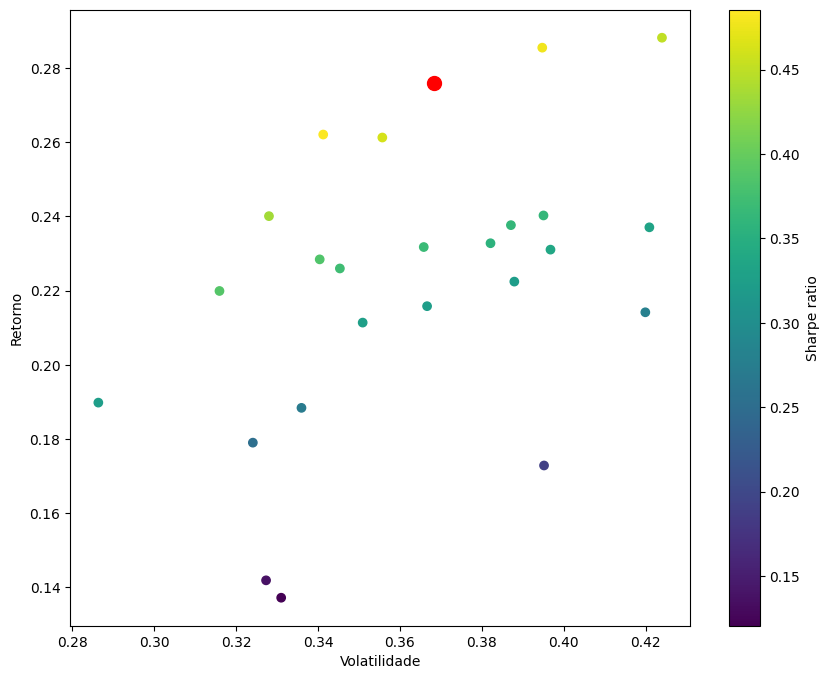

In [43]:
plt.figure(figsize=(10,8))
plt.scatter(ls_volatilidade, ls_retorno, c = ls_sharpe_ratio)
plt.colorbar(label = 'Sharpe ratio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.scatter(melhor_volatilidade, melhor_retorno, c = 'red', s = 100);


AGORA OS PESOS SERÃO CALCULADOS USANDO ALGORITMOS

In [44]:
# HILL CLIMB É USADO PARA MAXIMIZAR OU MINIZAR UM VALOR
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

In [45]:
taxa_selic_historico

array([12.75, 14.25, 12.25,  6.5 ,  5.  ,  2.  ,  9.25, 13.75, 11.75])

In [80]:
dataset_original = pd.read_csv('acoes.csv')
dinheiro_total = 5000
sem_risco = taxa_selic_historico.mean() / 100

In [81]:
def fitness_function(solucao):
    dataset = dataset_original.copy()
    pesos = solucao / solucao.sum()

    for i in dataset.columns[1:]:
        dataset[i] = (dataset[i] / dataset[i][0])

    for i, acao in enumerate(dataset.columns[1:]):
        dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total

    dataset.drop(labels = ['Date'], axis = 1, inplace=True)
    dataset['soma valor'] = dataset.iloc[:, 1:].sum(axis=1)
    dataset['taxa retorno'] = 0.0

    for i in range(1, len(dataset)):
        dataset.loc[i, 'taxa retorno'] = ((dataset.loc[i, 'soma valor'] / dataset.loc[i-1, 'soma valor']) - 1) 

    sharpe_ratio = (dataset['taxa retorno'].mean() - sem_risco) / dataset['taxa retorno'].std() * np.sqrt(246)
    # Se não liga para o risco, pode retornar o ultimo valor de 'soma_valor'
    return sharpe_ratio


In [82]:
np.random.seed(10)
pesos = np.random.random(len(dataset_original.columns) - 1)
pesos = pesos / pesos.sum()
pesos

array([0.26617196, 0.00716121, 0.21866313, 0.25840174, 0.17202779,
       0.07757418])

In [83]:
fitness_function(pesos)

-49.59161800917476

In [84]:
def visualiza_alocacao(solucao):
    colunas = dataset_original.columns[1:]
    for i in range(len(solucao)):
        print(colunas[i], solucao[i] * 100)

In [85]:
visualiza_alocacao(pesos)

GOL 26.617195545614496
CVC 0.7161207195395352
WEGE 21.866313475981215
MGLU 25.84017365648649
TOTS 17.202779081759033
BOVA 7.757417520619242


In [86]:
# DEPENDENDO DO QUE fitness_function RETORNAR, OS ALGORITMOS VAO TRABALHAR DIFERENTE
fitness = mlrose.CustomFitness(fitness_function)


In [87]:
# Existe .DiscreteOpt para retornar 1 ou 0, como se um produto vai ou não para o caminhão
# Serão gerados numeros randomicos entre 0 e 1
problema_maximizacao = mlrose.ContinuousOpt(length=6, fitness_fn=fitness, maximize = True, min_val = 0, max_val = 1)

In [88]:
problema_minimizacao = mlrose.ContinuousOpt(length=6, fitness_fn=fitness, maximize = False, min_val = 0, max_val = 1)

HILL CLIMB

In [89]:
# No inicio, é definido um valor randomico. O algoritmo vai buscar os melhores vizinhos até subir a montanha.
# A inicialização define a montanha que sera escalada. A incializazao é importante para definir o ponto maximo que o algoritmo pode chegar,

In [90]:
melhor_solucao, melhor_custo = mlrose.hill_climb(problema_maximizacao, random_state=1)
melhor_solucao, melhor_custo

(array([0.417022  , 0.        , 0.        , 0.70233257, 0.        ,
        0.        ]),
 -34.65324109934173)

In [91]:
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_solucao.sum()

(array([0.37255577, 0.        , 0.        , 0.62744423, 0.        ,
        0.        ]),
 1.0)

In [92]:
visualiza_alocacao(melhor_solucao)

GOL 37.25557684283148
CVC 0.0
WEGE 0.0
MGLU 62.74442315716853
TOTS 0.0
BOVA 0.0


In [93]:
_,_,_,soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=melhor_solucao)
soma_valor

19901.870522289333

In [94]:
pior_solucao, pior_custo = mlrose.hill_climb(problema_minimizacao, random_state=1)
pior_solucao, pior_custo


(array([0.417022  , 0.        , 0.10011437, 0.        , 0.04675589,
        0.79233859]),
 -98.88746009253278)

In [95]:
pior_solucao = pior_solucao / pior_solucao.sum()
pior_solucao, pior_solucao.sum()

(array([0.307486  , 0.        , 0.07381809, 0.        , 0.03447488,
        0.58422103]),
 1.0)

In [96]:
visualiza_alocacao(pior_solucao)

GOL 30.74860006744006
CVC 0.0
WEGE 7.381809203223874
MGLU 0.0
TOTS 3.447487593748618
BOVA 58.422103135587456


In [97]:
_,_,_,soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=pior_solucao)
soma_valor

10556.428590341966

SIMULATED ANNEALING

In [98]:
# Inspirado na têmpera da engenharia
# Comeca com uma variavel que representa a temperatura.
# O codigo vai rodar até a temperatura esfriar.
# Não apaga os resultados anteriores ruins, pois pode usar eles para sair de uma "montanha" e ir para outra mais alta
# Vai para uma solucao ruim para achar uma boa


In [ ]:
melhor_solucao, melhor_custo = mlrose.simulated_annealing(problema_maximizacao, random_state = 1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_custo

In [ ]:
visualiza_alocacao(melhor_solucao)

ALGORITMO GENETICO

In [ ]:
# O USUARIO ESCOLHE QUANTAS SOLUCOES SERAO GERADAS
# CADA GRUPO DE SOLUCOES É UM INDIVIDUO
# CROMOSSOMO É O CONJUNTO DE INDIVIDUOS
# GENE É CADA TERMO DE UM INDIVIDUO

# SE NÃO CHEGOU NO CRITERIO DE PARADA, SELECIONA OS INDIVIDUOS COM OS MELHORES RESULTADOS. ELES SERÃO OS PAIS DOS PROXIMOS INDIVIDUOS
# CROSSOVER: OS DADOS DOS PAIS SAO COMBINADOS E SURGEM FILHOS QUE SAO A MISTURA DOS PAIS
# MUTACAO: OS DADOS DOS PAIS SOFREM PEQUENAS MUDANÇAS EM SEUS VALORES

# É FEITA UMA NOVA AVALIÇAO NA POPULACAO. OS INDIVIDUOS RUINS SAO DESCARTADOS E UMA NOVA POPULACAO É DEFINIDA COM CROSSOVER E MUTACAO
# O PROCESSO SO IRA PARAR SE O CRITERIO DE PARADA FOR ALCANCADO.


In [ ]:
# O algoritmo nao aceita valor minimo 0
problema_maximizacao_ag = mlrose.ContinuousOpt(length=6, fitness_fn = fitness, maximize = True, min_val=0.1, max_val=1)

In [ ]:
melhor_solucao, melhor_custo = mlrose.genetic_alg(problema_maximizacao_ag, random_state=1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_custo

In [ ]:
visualiza_alocacao(melhor_solucao)